### Dev Harlan, Assignment 6

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp

Text(0.5, 1.0, 'Albedo as a Function of Temperature')

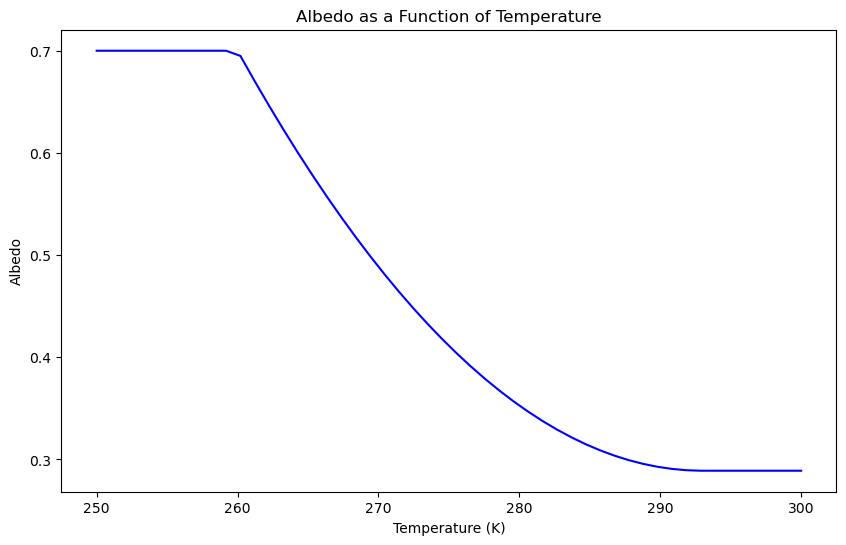

In [2]:
# Part (a)
# albedo feedback formula

def albedoFunc(T):
    a0 = 0.289 # the albedo of a warm, ice-free planet
    ai = 0.7   # the albedo of a very cold, completely ice-covered planet
    T0 = 293   #K is the threshold temperature above which we assume the planet is ice-free
    Ti = 260   #K is the threshold temperature below which we assume the planet is completely ice covered.
    
    if (T <= Ti):
        albedo = ai
    elif (T >= T0):
        albedo = a0
    else:
        albedo = a0 + (ai - a0) * ((T-T0)**2 / (Ti-T0)**2)

    return albedo

T = np.linspace(250, 300, 50)
#print(T.shape, T)

albedo = [albedoFunc(i) for i in T]
#print(albedo)

plt.figure(figsize=(10, 6))
plt.plot(T, albedo, label='Albedo', color='blue')

# Add labels and title
plt.xlabel('Temperature (K)')
plt.ylabel('Albedo')
plt.title('Albedo as a Function of Temperature')
#plt.legend()

Original Surface Temp: 288.34
New Surface Temp: 290.00
Delta: 1.65


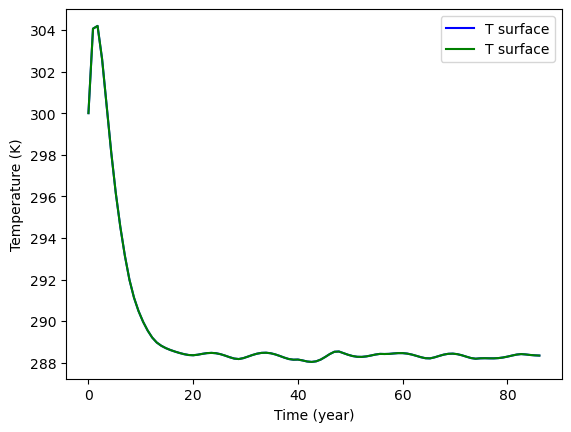

In [8]:
#Part (b)
# Radiation budget with albedo feedback

solar_constant = 1366
boltzmann_constant = 5.670374419e-8
heat_C = 4.0e8 # Heat Capacity Water = J/m2/K
albedo = 0.3
epsilon = 0.78 # GHG effect
M = 2 # layers

# heat balance function w/ 2 layer model GHG effect
def Tempfunc(t, u):  # Args: time range, 1D array of init values [0,0]
    f = np.zeros((M,))
    # u[0] = Ta (Temp Atmosphere)
    # u[1] = Ts (Temp Surface)
    
    f[0] = (solar_constant*(1-albedo)/4 - epsilon*boltzmann_constant*(u[0]**4) 
            - (1 - epsilon) * boltzmann_constant*(u[1]**4)) / heat_C
    f[1] = (solar_constant*(1-albedo)/4 + epsilon*boltzmann_constant*(u[0]**4)
            - boltzmann_constant*(u[1]**4)) / heat_C
    return f


# heat balance function w/ 2 layer model GHG effect + surface albedo
def TempAlbedofunc(t, u):  # Args: time range, 1D array of init values [0,0]
    f = np.zeros((M,))
    # u[0] = Ta (Temp Atmosphere)
    # u[1] = Ts (Temp Surface)
    albedo_var = albedoFunc(u[1])
    
    f[0] = (solar_constant*(1-albedo)/4 - epsilon*boltzmann_constant*(u[0]**4) 
            - (1 - epsilon) * boltzmann_constant*(u[1]**4)) / heat_C
    f[1] = (solar_constant*(1-albedo_var)/4 + epsilon*boltzmann_constant*(u[0]**4)
            - boltzmann_constant*(u[1]**4)) / heat_C
    return f
    
# Initial conditions
#u0 = np.zeros((M,)) # init all Temp = 0, 1D array
u0 = [290,300]
dt = 365*24*60*60  # time step = one year (in seconds)
t0 = 0
tmax = 100 * dt
t= np.arange(t0, tmax, dt)

sol = solve_ivp(Tempfunc, [t0, tmax], u0, method='RK45', t_eval=t)

# w/ jump to GHG epsilon 0.8 + Varying Albedo
epsilon = 0.8
sol2 = solve_ivp(TempAlbedofunc, [t0, tmax], u0, method='RK45', t_eval=t)

fig = plt.figure()
plt.plot(sol.t / (365*24*60*69), sol.y[1], 'b-', label='T surface')
plt.plot(sol2.t / (365*24*60*69), sol.y[1], 'g-', label='T surface')
plt.xlabel('Time (year)')
plt.ylabel('Temperature (K)')
plt.legend()

print("Original Surface Temp: %0.2f" % sol.y[1][99])
print("New Surface Temp: %0.2f" % sol2.y[1][99])
print("Delta: %0.2f" % (sol2.y[1][99]-sol.y[1][99]))